# PA 7.2

In [23]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt

## Cleaning from the Notes

In [24]:
ames = pd.read_csv("/Users/stolieerickson/Documents/MSBA/Fall/GSB544-Computing/InClass/Wk7/AmesHousing.csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

## Practice Activity

Make a pipeline that uses all the variables in the Ames dataset, and then fits Ridge Regression with lambda = 1

Cross-validate this pipeline and compare the results to the ordinary linear regression.

Then fit the model on the whole dataset and get the coefficients. Make a plot of these coefficients compared to the ones from ordinary linear regression.

R-squared for Linear Regression: -8.236242411265846e+17
R-squared for Linear Regression: -8.236242411265846e+17


R-squared for Ridge Regression: 0.8669612898820173
R-squared for Ridge Regression: 0.8669612898820173


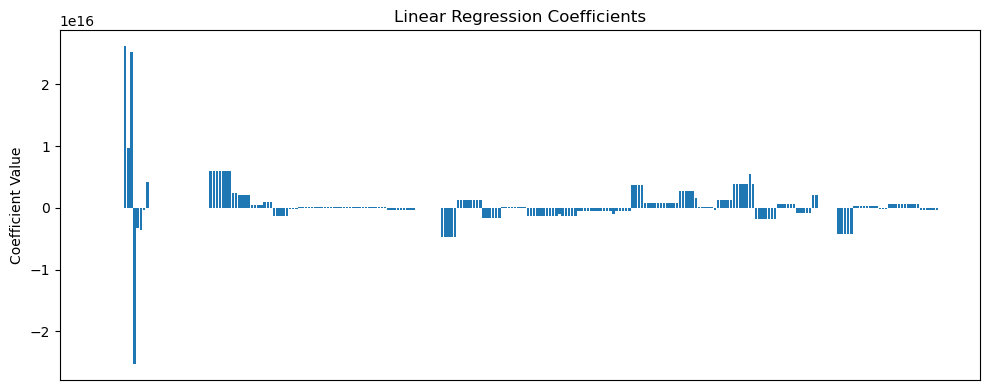

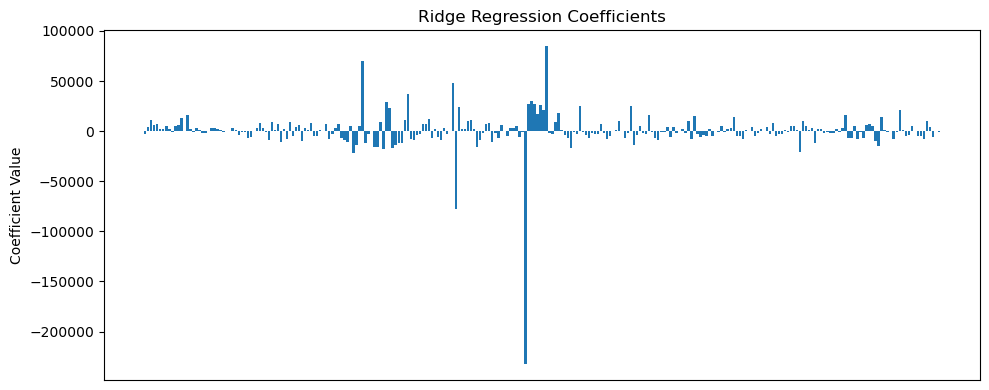

In [25]:
#predictor and response variable
X = ames.drop(['SalePrice', 'Order', 'PID'], axis = 1)
y = ames['SalePrice']

#transform numeric variables, and replace NA values via imputation
num_transformer = Pipeline(
    [("imputer", SimpleImputer(strategy='mean')),
     ("scaler", StandardScaler())]
)

#dummify categorical variables, impute missing with UNK for unknown
cat_transformer = Pipeline(
    [("impute", SimpleImputer(strategy='constant', fill_value="UNK")),
     ("ohe", OneHotEncoder(handle_unknown='ignore', sparse_output = False))]
)

#apply the pipelines to the respective columns
ct = ColumnTransformer(
    [('num', num_transformer, make_column_selector(dtype_include=np.number)),
     ('cat', cat_transformer, make_column_selector(dtype_include=object))],
    remainder="passthrough"
)

#linear regression pipeline
pipeline_lr = Pipeline(
    [("preprocessing", ct),
     ("lr", LinearRegression())]
)

#ridge regression pipeline
pipeline_ridge = Pipeline(
    [("preprocessing", ct),
     ("ridge", Ridge(alpha=1.0))]
)

#scores
scores = cross_val_score(pipeline_lr, X, y, cv=5, scoring='r2')
print(f"R-squared for Linear Regression: {scores.mean()}")
scores = cross_val_score(pipeline_ridge, X, y, cv=5, scoring='r2')
print(f"R-squared for Ridge Regression: {scores.mean()}")

#plot 
pipeline_lr.fit(X, y)
coef_lr = pipeline_lr.named_steps['lr'].coef_

pipeline_ridge.fit(X, y)
coef_ridge = pipeline_ridge.named_steps['ridge'].coef_

plt.figure(figsize=(10, 4))
plt.bar(range(len(coef_lr)), coef_lr)
plt.title('Linear Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.xticks([])
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.bar(range(len(coef_ridge)), coef_ridge)
plt.title('Ridge Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.xticks([])
plt.tight_layout()
plt.show()

## Practice Activity

Using the same pipeline as previously, perform tuning on lambda

You should always try lambda values on a log scale; that is, don’t use [1,2,3,4]; instead use something like [0.001, 0.01, 0.1, 1, 10]

In [26]:
lambda_values = [0.001, 0.01, 0.1, 1, 10]

lambdas = {'ridge__alpha': lambda_values}

gscv = GridSearchCV(pipeline_ridge, lambdas, cv=5, scoring='r2')
gscv.fit(X, y)

best_lambda = gscv.best_params_['ridge__alpha']
best_score = gscv.best_score_

print(f"Best lambda: {best_lambda}")
print(f"Best R-squared: {best_score}")

Best lambda: 10
Best R-squared: 0.8682788154925252
Best lambda: 10
Best R-squared: 0.8682788154925252


## Practice Activity

Create a LASSO pipeline, and tune lambda
Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS

Warning
The sklearn function Lasso() uses the argument name alpha for lambda.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.165e+11, tolerance: 1.414e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.515e+11, tolerance: 1.534e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.246e+11, tolerance: 1.527e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.798e+11, tolerance: 1.470e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.503e+11, tolerance: 1.530e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.275e+11, tolerance: 1.414e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.929e+11, tolerance: 1.534e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.594e+11, tolerance: 1.527e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.385e+11, tolerance: 1.470e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.610e+11, tolerance: 1.530e+09
  model = cd_fast.enet_coordinate_descent(


Best alpha: 10
Best R-squared: 0.8675104234129281
Best alpha: 10
Best R-squared: 0.8675104234129281


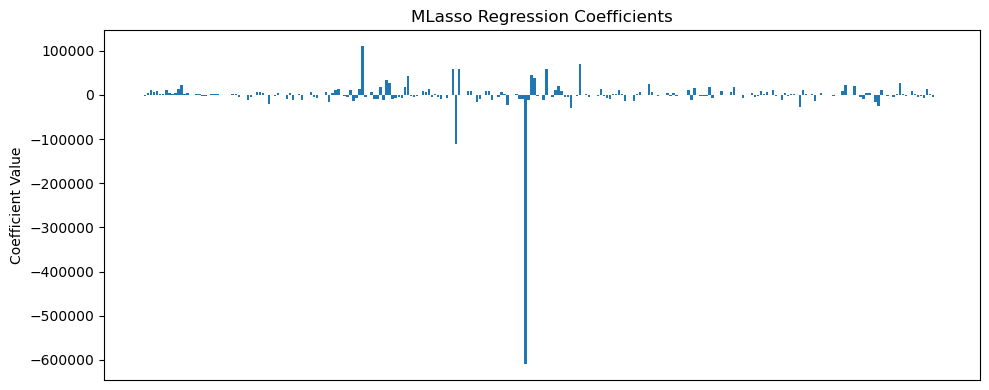

In [27]:
#lasso pipeline
pipeline_lasso = Pipeline(
    [("preprocessing", ct),
     ("lasso", Lasso(alpha=1.0, max_iter=10000))]
)

#tune lambda (called alpha for Lasso)
alpha_values = [0.001, 0.01, 0.1, 1, 10]

alphas = {'lasso__alpha': alpha_values}

gscv = GridSearchCV(pipeline_lasso, alphas, cv=5, scoring='r2')
gscv.fit(X, y)

best_alpha = gscv.best_params_['lasso__alpha']
best_score = gscv.best_score_

print(f"Best alpha: {best_alpha}")
print(f"Best R-squared: {best_score}")

#pull coefficients
pipeline_lasso.fit(X, y)
coef_lasso = pipeline_lasso.named_steps['lasso'].coef_

#plot
plt.figure(figsize=(10, 4))
plt.bar(range(len(coef_lasso)), coef_lasso)
plt.title('MLasso Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.xticks([])
plt.tight_layout()
plt.show()

## Practice Activity

Create an Elastic Net pipeline, and tune lambda and alpha.
Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.684e+11, tolerance: 1.414e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.421e+11, tolerance: 1.534e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.322e+11, tolerance: 1.527e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.538e+11, tolerance: 1.470e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.416e+11, tolerance: 1.530e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.433e+09, tolerance: 1.414e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.014e+09, tolerance: 1.534e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.431e+10, tolerance: 1.527e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.616e+09, tolerance: 1.470e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.342e+09, tolerance: 1.530e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.742e+11, tolerance: 1.414e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.424e+11, tolerance: 1.534e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.774e+11, tolerance: 1.527e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.698e+11, tolerance: 1.470e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.447e+11, tolerance: 1.530e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.165e+11, tolerance: 1.414e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.515e+11, tolerance: 1.534e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.246e+11, tolerance: 1.527e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.798e+11, tolerance: 1.470e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.503e+11, tolerance: 1.530e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.998e+11, tolerance: 1.414e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.815e+11, tolerance: 1.534e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.300e+11, tolerance: 1.527e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.651e+11, tolerance: 1.470e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.745e+11, tolerance: 1.530e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.275e+11, tolerance: 1.414e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.929e+11, tolerance: 1.534e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.594e+11, tolerance: 1.527e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.385e+11, tolerance: 1.470e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.610e+11, tolerance: 1.530e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.086e+12, tolerance: 1.414e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.192e+12, tolerance: 1.534e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.013e+12, tolerance: 1.527e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.310e+11, tolerance: 1.470e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.175e+12, tolerance: 1.530e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.992e+12, tolerance: 1.414e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.158e+12, tolerance: 1.534e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.001e+12, tolerance: 1.527e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.860e+12, tolerance: 1.470e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+12, tolerance: 1.530e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.673e+12, tolerance: 1.414e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.047e+12, tolerance: 1.534e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.960e+12, tolerance: 1.527e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.740e+12, tolerance: 1.470e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.026e+12, tolerance: 1.530e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Best alpha: 0.01
Best l1_ratio: 0.5
Best R-squared: 0.8682417702342258
Best alpha: 0.01
Best l1_ratio: 0.5
Best R-squared: 0.8682417702342258


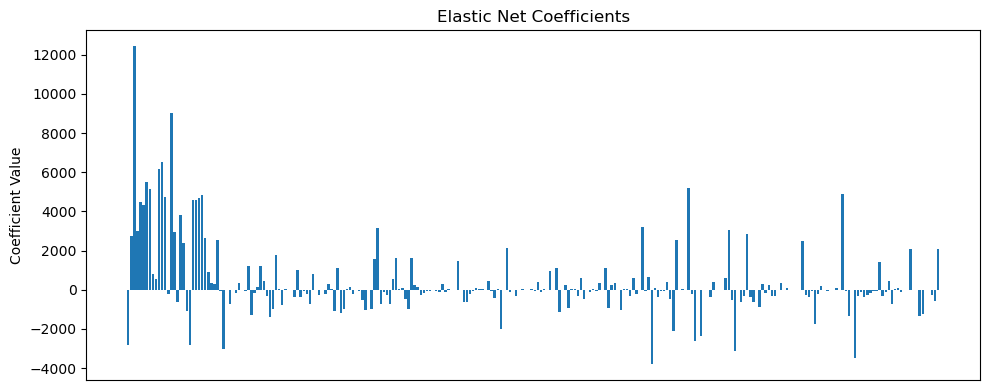

In [28]:
#elastic pipeline
pipeline_elastic = Pipeline(
    [("preprocessing", ct),
     ("elastic", ElasticNet(alpha=1, l1_ratio=0.5, max_iter=10000))]
)

params = {
    "elastic__alpha": [0.001, 0.01, 0.1, 1, 10],
    "elastic__l1_ratio": [0.0, 0.25, 0.5, 0.75, 1.0]
}

gscv = GridSearchCV(pipeline_elastic, params, cv=5, scoring='r2')
gscv.fit(X, y)

best_alpha = gscv.best_params_['elastic__alpha']
best_l1_ratio = gscv.best_params_['elastic__l1_ratio']
best_score = gscv.best_score_

print(f"Best alpha: {best_alpha}")
print(f"Best l1_ratio: {best_l1_ratio}")
print(f"Best R-squared: {best_score}")

#pull coefficients
pipeline_elastic.fit(X, y)
coef_elastic = pipeline_elastic.named_steps['elastic'].coef_

#plot
plt.figure(figsize=(10, 4))
plt.bar(range(len(coef_elastic)), coef_elastic)
plt.title('Elastic Net Coefficients')
plt.ylabel('Coefficient Value')
plt.xticks([])
plt.tight_layout()
plt.show()